### Notebook for Project2 for Programming for Data Analysis

## An analysis of paleo-present climate data

Phelim Barry

***

## Table of Contents

1. CO2 from 800000 BC - present
2. Temperature Anomoly from 800000 BC - present
3. CH4 from 800000 BC - present
4. Irish Rainfall and Temperature 
5. Fusing and Exporting Data
6. Further Analysis and Discussion
7. References

In [1]:
# Import Modules
import pandas as pd
import seaborn as sns
import json
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# CO2 800000 BC - present


---

### Read in CO2 Data files

Older datasets are available on the NCEI (National Center for Environmental Information)$^1$ website while more recent data sets are sourced from the GML (Global Monitoring Laboratory)$^2$ website. 

In [2]:
# Read Data

# Need to install xlrd to reaad .xls file
# pip install xlrd

# Data from 800000 BC to 2000
ncei_df_col_names = ["year", "CO2", 'sigma']
ncei_df = pd.read_excel("https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2.xls", sheet_name="CO2 Composite",skiprows = range(1, 15),names=ncei_df_col_names)

# Data from 2000 to 2020
gml_df_col_names = ["date", "CO2", 'UNC']
gml_df = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv",skiprows=44, sep=",", names=gml_df_col_names)

### Cleanup the data as necessary

In [3]:
# Reformat the year column and create a new one as date

new_ncei_df = 1950-ncei_df['year'] # year 0 in the file refers to 1950
ncei_df['date'] = new_ncei_df
ncei_df['date'] = ncei_df['date'].astype(int)

### Plot CO2 Data

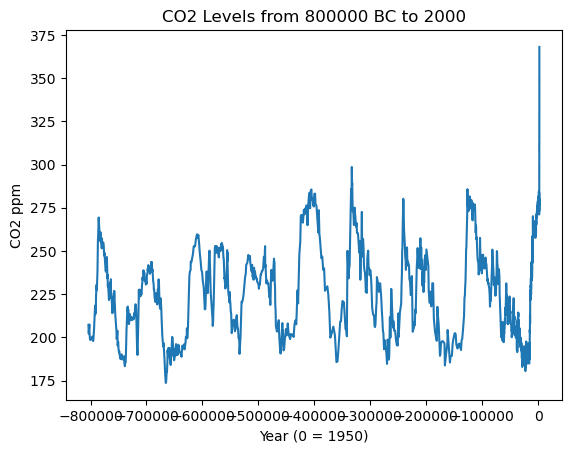

In [4]:
plot = sns.lineplot(data=ncei_df, x='date', y='CO2')
plot.set_xlabel("Year (0 = 1950)")
plot.set_ylabel("CO2 ppm")
plot.set_title("CO2 Levels from 800000 BC to 2000");

In our first plot we use the data from NCEI $^1$ to plot the CO2 values from 800000 BC to 2000. We can see that up to about 1950 the plot is pretty consistent. There are peaks and troughs along the way but values for CO2 generally stay between 175 and 300. However from 1950 through to 2000 the trend is a significant and very sharp increase in CO2 levels.

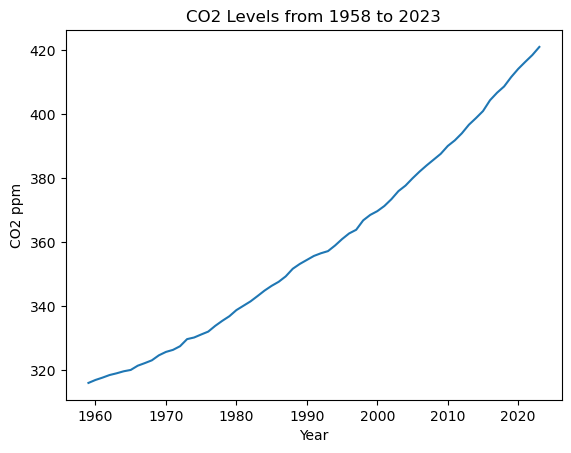

In [5]:
plot = sns.lineplot(data=gml_df, x='date', y='CO2')
plot.set_xlabel("Year")
plot.set_ylabel("CO2 ppm")
plot.set_title("CO2 Levels from 1958 to 2023");

In our second plot using data from NOAA $^2$ we plot the CO2 values from 1958 through to 2022 and can see a steady and consistent rise in CO2 levels. Starting at around 300ppm in 1958 the CO2 level has risen to over 420ppm in little over 60 years.

### Combine the data to validate the data is similar for overlapping years

In [6]:
# Extract data for overlapping years from both sources

gml_comp_df = gml_df.head(43)
# Reverse the order in the dataframe. From: https://stackoverflow.com/questions/20444087/right-way-to-reverse-a-pandas-dataframe
gml_comp_df.iloc[::-1]
ncei_comp_df = ncei_df.head(48)

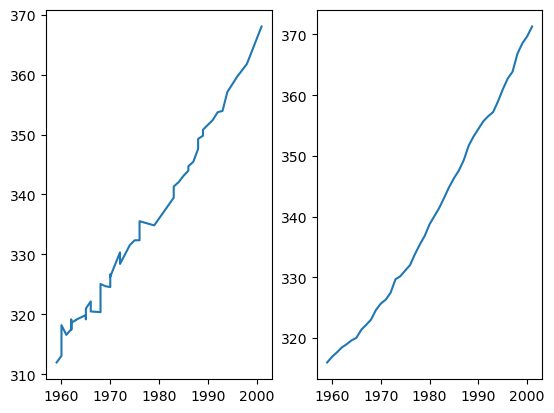

In [7]:
# Combine the plots to validate similar data
# If the data matches then we are good to combine the files for use as our final data file

figure, (ax1, ax2) = plt.subplots(1, 2)
# data=ncei_comp_df, x='date', y='CO2'
x1 = ncei_comp_df['date']
y1 = ncei_comp_df['CO2']

x2 = gml_comp_df['date']
y2 = gml_comp_df['CO2']

ax1.plot(x1, y1);
ax2.plot(x2, y2);

When comparing the data from both data sources for the years that overlap (1959 - 2001) we can see that from the above plots that the trend is very similar. Both start with readings in the 310s and finish close to 370. Data from NCEI shows a number of ups and downs in the reading as opposed to GML data which is a much smoother line but the general trend is very similar.

From this we can make an assumption that it is OK to combine the data so as to be able to plot from 800000 BC to the present day.

### Combine CO2 dataframes so as to give 800000 BC to present day data

ncei data = -800000 to 2001   
gml data = 1959 to 2022

In [8]:
# split out required data

final_ncei_df = ncei_df[['date', 'CO2']] # -800000 to 2001 
final_gml_df = gml_df[['date', 'CO2']].tail(21) # 2002 to 2022
final_gml_df['date'] = gml_df['date'].astype(int)
final_gml_df = final_gml_df.sort_values(by=['date'],ascending=False)

#Concatenate the two - https://pandas.pydata.org/docs/user_guide/merging.html
dfs_to_concat = [final_gml_df, final_ncei_df]
final_co2_df = pd.concat(dfs_to_concat, ignore_index = True)

### Complete CO2 plot from 800000 BC to 2022

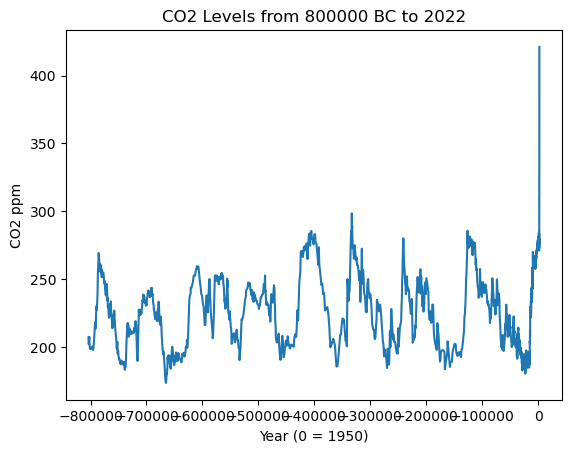

In [9]:
plot = sns.lineplot(data=final_co2_df, x='date', y='CO2');
plot.set_xlabel("Year (0 = 1950)")
plot.set_ylabel("CO2 ppm")
plot.set_title("CO2 Levels from 800000 BC to 2022");

The plot looks very similar to the original plot from 800000 BC to 2000 given the scale and number of data points.

### CO2 plot from 1500 to 2022

To get a clearer picture of when the increase in CO2 levels started to happen we reduce the years and plot from the 1500s to the present day.

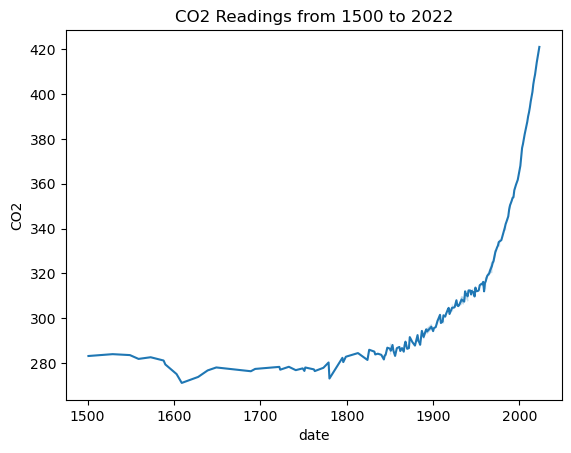

In [10]:
reduced_final = final_co2_df.head(219)

sns.lineplot(data=reduced_final, x='date', y='CO2').set(title='CO2 Readings from 1500 to 2022');

From this we can see that the dramatic increase in CO2 levels started in the late 1700s which correspond directly with the Industrial Revolution. $^3$. Our plot shows CO2 levels averaging between 275 and 285 ppm until the late 1700s which aligns with a recent report published by the University of Michigen $^4$ which shows that CO2 levels were consistent around 278ppm pre the industrial revolution.

# Temperature Anomaly 800000 BC - present

Note: Temperature Anomaly = temperature difference from the average of the last 1000 years

### Import the Data


In [11]:
# Read in the data from NOAA source - https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt
# Column 5: Temperature estimate (temperature difference from the average of the last 1000 years)
temp1_col_names = ["bag", "ztop", 'age', 'Deot', 'Temp']
temp1_df = pd.read_csv("https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt", skiprows = 92, delim_whitespace=True, names=temp1_col_names)


### Cleanup the Data

In [12]:
# Clean up the date and headings

new_temp_df2 = 1950-temp1_df['age']
temp1_df['date'] = new_temp_df2
temp1_df['date'] = temp1_df['date'].astype(int)

### Plot Temperature Anomaly

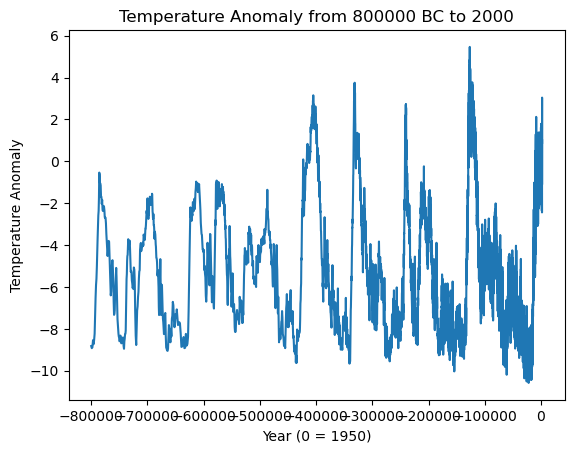

In [13]:
# Plot the Temperature Anomaly Data from -800000 to 2000

plot = sns.lineplot(temp1_df, x='date', y='Temp')
plot.set_xlabel("Year (0 = 1950)")
plot.set_ylabel("Temperature Anomaly")
plot.set_title("Temperature Anomaly from 800000 BC to 2000");

In our first Temperature Anomaly plot we use the data from NCEI $^1$ and plot the values from 800000 BC to 2000. We can see that from 800000 to about 400000 BC the Temperature Anomaly was always less than zero, indicating that the temperature never went about the average for the last 1000 years. However since 400000 BC the Temperature Anomaly value peaks above zero roughly every 100000 years. It also shows that cold periods (i.e. when the Temperature Anomaly is less than zero) are lasting longer. We can also see when the last ice age finished (around 10000 years ago) and that the Temperature Anomaly has been on the rise since then.

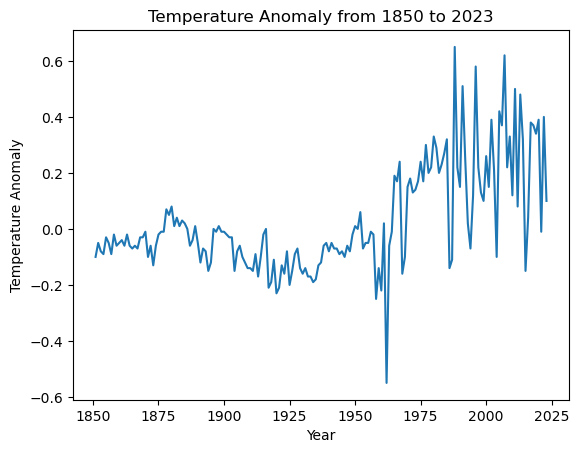

In [14]:
# Import Temperature Anomaly data from 1850 to present

temp2_col_names = ['date', 'Temp']
temp2_df = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/antarctic/land_ocean/12/11/1850-2023/data.csv", skiprows = 5, sep=',', names=temp2_col_names)

plot = sns.lineplot(data=temp2_df, x='date', y='Temp')
plot.set_xlabel("Year")
plot.set_ylabel("Temperature Anomaly")
plot.set_title("Temperature Anomaly from 1850 to 2023");

Looking at more recent data from NCEI $^1$ we see that from 1850 to 1950 that the Temperature Anomaly was around zero indicating the temperate was on par with the average for the last 1000 years. But since the 1960s we are seeing an increase in the temperature with only a handful of years producing a temperate lower than the average from the last 1000 years.

### Combine data sets

In [15]:
# split out required data to combine both datasets
final_temp1_df = temp1_df[['date', 'Temp']] # -800000 to 2000 
final_temp2_df = temp2_df[['date', 'Temp']].tail(23) # 2001 to 2022
final_temp2_df['date'] = final_temp2_df['date'].astype(int)
final_temp2_df = final_temp2_df.sort_values(by=['date'],ascending=False)

# Concatenate the two - https://pandas.pydata.org/docs/user_guide/merging.html
dfs_to_concat2 = [final_temp2_df, final_temp1_df]
final_df_2 = pd.concat(dfs_to_concat2, ignore_index = True)

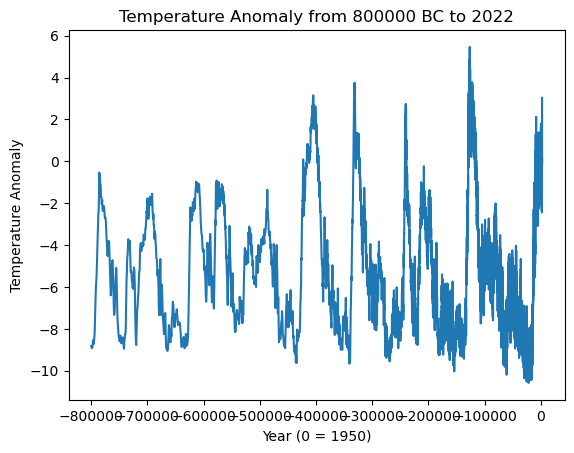

In [16]:
# plot the Temperature Anomaly data for 800000 BC to 2022 - temperature difference from the average of the last 1000 years
plot = sns.lineplot(data=final_df_2, x='date', y='Temp')
plot.set_xlabel("Year (0 = 1950)")
plot.set_ylabel("Temperature Anomaly")
plot.set_title("Temperature Anomaly from 800000 BC to 2022");


Taking the full set of data from 800000 BC to the present day we see that the graph is still consistent with peaks and troughs and that the Temperature Anomaly is currently above zero in line with us seeing a peak roughly every 100000 years.

### CO2 and Temperature Anomaly

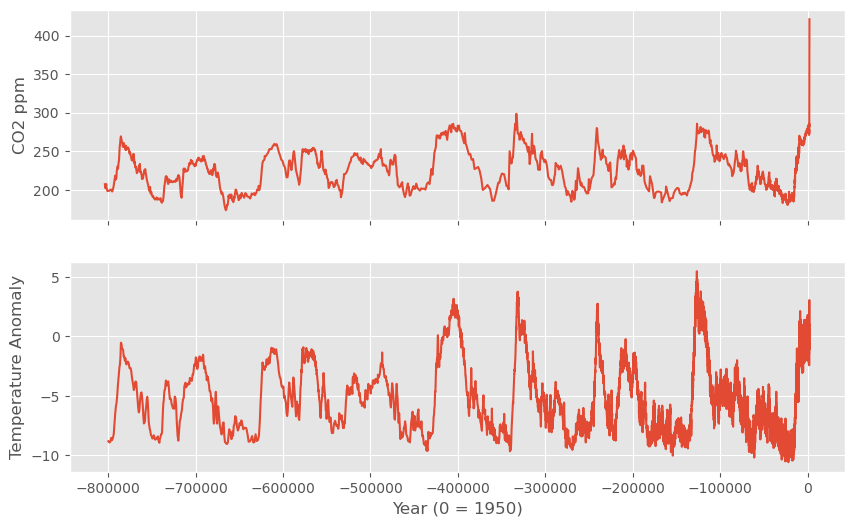

In [17]:
# Plot CO2 v Temperature Anomaly
# Use of ggplot from https://www.geeksforgeeks.org/data-visualization-using-plotnine-and-ggplot2-in-python/
# and https://notebook.community/CommonClimate/teaching_notebooks/GEOL157L/GEOL157_Lab5_paleclimate_records

plt.style.use('ggplot')
fig, ax = plt.subplots(2,sharex=True,figsize=(10,6))
ax[0].plot(final_co2_df['date'],final_co2_df['CO2'])
ax[0].set_ylabel(r'CO2 ppm')

ax[1].plot(final_df_2['date'],final_df_2['Temp'])
ax[1].set_ylabel(r'Temperature Anomaly')
ax[1].set_xlabel('Year (0 = 1950)');
#fig.subplots_adjust(hspace=0)

We can see that from the initial readings of 800000 BC right through to the present day that rises in CO2 levels coincide with rises in the Temperature Anomaly. And likewise, falls in CO2 levels happen at roughly the same time as the Temperature Anomaly drops. Each year that the Temperature Anomaly goes above zero we see a corrosponding peak in CO2 leves to close or above 300 ppm.

# CH4 800000 BC - present

Older datasets for CH4 are available on the United States EPA (Environmental Protection Agency)$^5$ website while more recent data sets are sourced from the GML (Global Monitoring Laboratory)$^2$ website. 

In [18]:
# Import CH4 data for -800000 to 2015
# Note: due to issues with the file format/encoding of the source data, we use a locally saved copy instead.

ch4_col_names = ['year', 'CH4', 'law', 'cape', 'Mauna', 'Shetlands']
# ch4_df = pd.read_csv("https://climatechange.chicago.gov/sites/production/files/2016-08/ghg-concentrations_fig-2.csv", skiprows = 8, sep = ',', names=ch4_col_names)
ch4_df = pd.read_excel("source_data/CH4_data.xlsm", sheet_name="sheet1",skiprows = range(1, 8),names=ch4_col_names)

### Cleanup the data

In [19]:
# EPICA Dome station is taken as the primary source but does not have data for all the years so we fill in the gaps from the other stations in the file
# Note that from the year 1003, a combination of sources - EPICA Dome, Law Dome, Mauna Loa and Cape Grim are used

ch4_df.CH4.fillna(ch4_df.law, inplace=True)
ch4_df.CH4.fillna(ch4_df.cape, inplace=True)
ch4_df.CH4.fillna(ch4_df.Mauna, inplace=True)

# Drop row with invalid data: https://stackoverflow.com/questions/60698147/how-to-drop-a-row-using-iloc-method
ch4_df.drop(labels=2175, inplace=True)

### Plot CH4

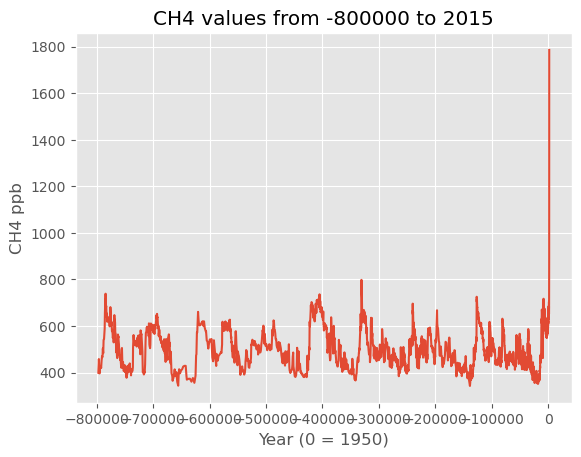

In [20]:
# Plot the graph
plot = sns.lineplot(data=ch4_df, x='year', y='CH4')
plot.set_xlabel("Year (0 = 1950)")
plot.set_ylabel("CH4 ppb")
plot.set_title("CH4 values from -800000 to 2015");

Firstly, looking at our CH4 graph from 800000 BC to 2015 using data from the EPA $^5$ we can see the graph follows a similar trend to our CO2 graph earlier. Again we see a number of peaks and troughs with the average staying consistently the same around 600ppb up until recent years. The CO2 reading was on the rise since before 1950 but since then it is increasing at a much higher rate than ever before and is showing no signs of slowing down.

In [21]:
# Import CH4 data for 1984 to 2022

ch4v2_col_names = ['year', 'CH4', 'unc']
ch4v2_df = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt", skiprows = 46, delim_whitespace=True, names=ch4v2_col_names)


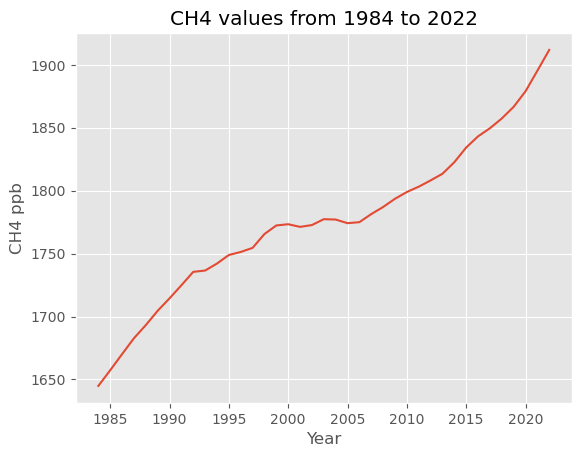

In [22]:
plot = sns.lineplot(data=ch4v2_df, x='year', y='CH4')
plot.set_xlabel("Year")
plot.set_ylabel("CH4 ppb")
plot.set_title("CH4 values from 1984 to 2022");


Taking the data from the GML website $^2$ we plot the CH4 values for the years 1984 to 2022 and can see for each year with the exception of a couple of years around the turn of the century that the CH4 values are consistently on the rise.

### Combine the data sets

In [23]:
# Combine the two data sets to give data to the present day

# split out required data from each dataset
final_CH4_df = ch4_df[['year', 'CH4']] # -800000 to 2015 
final_CH4_df2 = ch4v2_df[['year', 'CH4']].tail(7) # 2016 to 2022

# Concatenate the two: https://pandas.pydata.org/docs/user_guide/merging.html
dfs_to_concat_ch4 = [final_CH4_df, final_CH4_df2]
final_ch4_df = pd.concat(dfs_to_concat_ch4, ignore_index = True)
#final_ch4_df


### Plot CH4 from 800000 BC to 2022

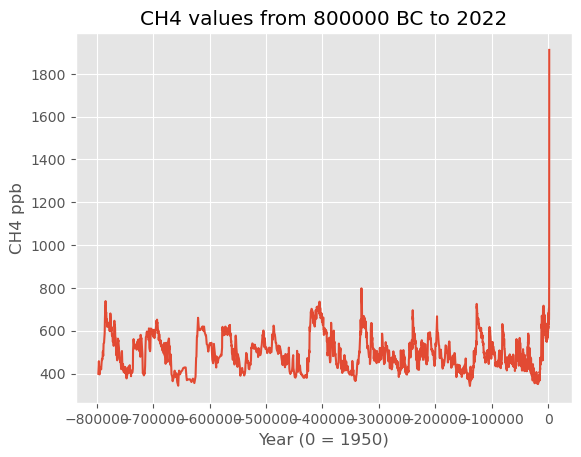

In [24]:
# final_ch4_df = final_ch4_df.astype(int)
plot = sns.lineplot(data=final_ch4_df, x='year', y='CH4')
plot.set_xlabel("Year (0 = 1950)")
plot.set_ylabel("CH4 ppb")
plot.set_title("CH4 values from 800000 BC to 2022");

In [25]:
print(f"The average CH4 reading up to 1900 was {final_ch4_df['CH4'].head(2143).mean():.2f} ppb. However, since 1900 the average is {final_ch4_df['CH4'].tail(72).mean():.2f} ppb")

The average CH4 reading up to 1900 was 523.71 ppb. However, since 1900 the average is 1465.39 ppb


From looking at our CH4 grabh going back to 800000 BC we can see that the average stayed pretty consistent with instances of a quick rise in readings followed by a gradual fall back down to around 400 each time. However it's clear that in the last couple of hundred years that the CH4 values have dramatically increased 4 fold.

Given the spread of dates in the above graph it's difficult to see when the actual large increase in CH4 levels started to happen so we will reduce our data range and plot more recent dates.

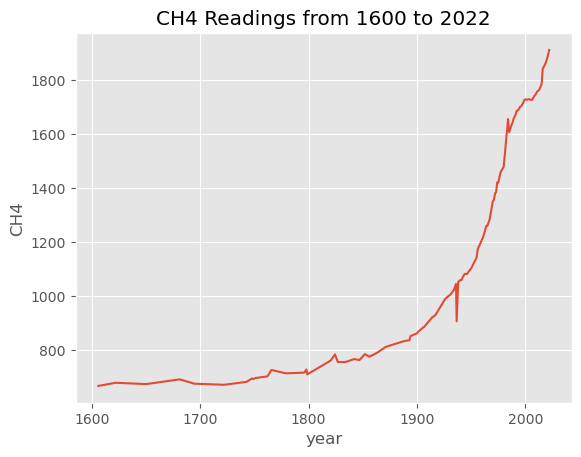

In [26]:
reduced_ch4_final = final_ch4_df.tail(105)

sns.lineplot(data=reduced_ch4_final, x='year', y='CH4').set(title='CH4 Readings from 1600 to 2022');

Taking a reduced dataset from 1600 to the present day we can see that up until the mid-late 1700s that the CH4 value was pretty flat in the mid 700s but then a dramatic increase started and has continued right through to the present day. This aligns with a recent report published by the University of Michigen $^4$ which shows that CH4 levels were consistent around 720ppb pre the industrial revolution and broke the 1900ppb mark in 2021.

### Plot CH4 and Temperature Anomaly

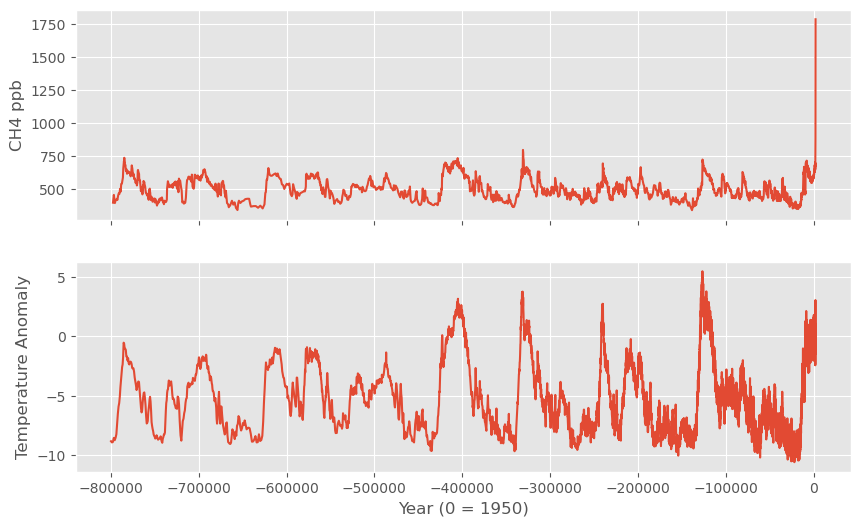

In [27]:
# Plot CH4 v Temperature Anomaly
# Use of ggplot from https://www.geeksforgeeks.org/data-visualization-using-plotnine-and-ggplot2-in-python/
# and https://notebook.community/CommonClimate/teaching_notebooks/GEOL157L/GEOL157_Lab5_paleclimate_records

plt.style.use('ggplot')
fig, ax = plt.subplots(2,sharex=True,figsize=(10,6))
ax[0].plot(ch4_df['year'],ch4_df['CH4'])
ax[0].set_ylabel(r'CH4 ppb')

ax[1].plot(final_df_2['date'],final_df_2['Temp'])
ax[1].set_ylabel(r'Temperature Anomaly')
ax[1].set_xlabel('Year (0 = 1950)');
#fig.subplots_adjust(hspace=0)

When comparing CH4 values and the Temperature Anomaly we see a consistent pattern again showing that when the CH4 levels rise, the Temperature Anomaly also rises. We see again the impact of the Temperature Anomaly going above zero matches when the CH4 level goes above 750 ppb.

---

# Irish Context

In this section we will examine Irish data in terms of Temperature and Rainfall and look at the trend over the last 50 years.

For our analysis of the Irish data in terms of temperature and rainfall, the Irish Meteorological Service of Ireland has a number of stations around the country capturing data which we use. We have decided to use the data produced by the Sherkin Island station as the numbers it records are almost identical to the overall country average. For example the yearly average rainfall taking the country as a whole is approx 1208mm according to worldbank.org $^6$ while Sherkin Island receives an average of 1195mm. 

The long term datasets used in this analysis are availble for download from the met.ie website $^7$.


### Read data

In [28]:
# Data sourced from https://www.met.ie/climate/available-data/historical-data (Sherkin Island)

ir_si_data_col_names = ['date', 'rain', 'maxt', 'mint']
ir_data_si_df = pd.read_csv("source_data/sherkin_island_1972_2023.csv", skiprows = range(0, 745), sep=',', names=ir_si_data_col_names, usecols=[0,2,4,6])

### Data Cleanup

In [29]:
# Convert date field to datetime
ir_data_si_df['date'] = pd.to_datetime(ir_data_si_df['date'])

# Convert date field to period in months
ir_data_si_df['date2'] = ir_data_si_df['date'].dt.to_period('Y')

# Get average rainfall by year/month
df_mean = ir_data_si_df.groupby(['date2'])[['rain']].mean() # https://stackoverflow.com/questions/74578718/pandas-dataframe-column-name-is-oriented-incorrectly
df_mean = df_mean.reset_index() 

# Changing datetime from period back to datetime: https://stackoverflow.com/questions/57580072/changing-period-to-datetime
df_mean['date2'] = df_mean['date2'].astype(str)
df_mean['date2'] = pd.to_datetime(df_mean['date2'])

### Rainfall Analysis

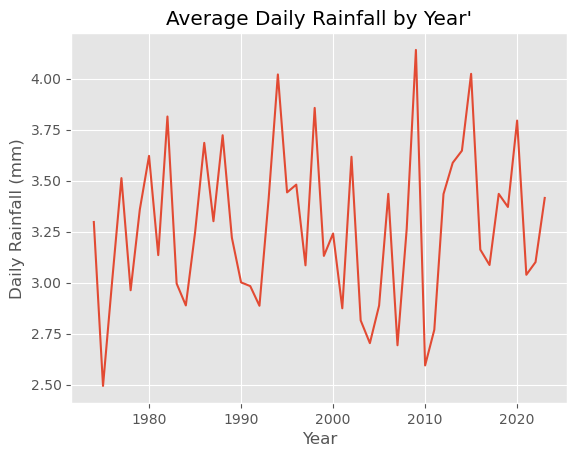

In [30]:
# Plot the rainfall graph
plot = sns.lineplot(data=df_mean, x='date2', y='rain')
plot.set_xlabel("Year")
plot.set_ylabel("Daily Rainfall (mm)")
plot.set_title("Average Daily Rainfall by Year'");

In [31]:
print(f"The mean daily rainfall recorded at Sherkin Island is {df_mean['rain'].mean():.2f}mm or a total of {(df_mean['rain'].mean()*365):.2f}mm yearly")

The mean daily rainfall recorded at Sherkin Island is 3.27mm or a total of 1194.96mm yearly


From our graph showing the average daily rainfall recorded at Sherkin Island for the last 50 years, we can see that the average is somewhere around 3.25 mm. We see that some years are wetter than others, in particular, 2009 had the highest daily average rainfall of almost 4.25 mm while 1974 had the lowest daily average rainfall of 2.5mm.   

Overall, the peaks and troughs seem to balance out with a wetter year typically following a drier year. The 2000s seemed to have been the driest decade and interestingly enough, since 2010 there has only been one year where the average daily rainfall was below 3mm indicating that potentially we are getting more rain in the last decade then before. 

### Temperature Analysis

In [32]:
# Get average min temp by year/month
ir_data_si_df["mint"] = pd.to_numeric(ir_data_si_df["mint"], errors='coerce')
df_mint = ir_data_si_df.groupby(['date2'])[['mint']].mean(numeric_only=True) # https://stackoverflow.com/questions/74578718/pandas-dataframe-column-name-is-oriented-incorrectly
df_mint = df_mint.reset_index() 

# Changing datetime from period back to datetime: https://stackoverflow.com/questions/57580072/changing-period-to-datetime
df_mint['date2'] = df_mint['date2'].astype(str)
df_mint['date2'] = pd.to_datetime(df_mint['date2'])

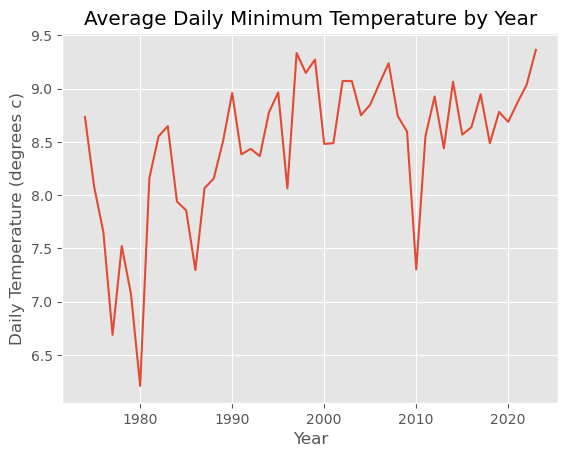

In [33]:
# Plot the minimum temperature graph

plot = sns.lineplot(data=df_mint, x='date2', y='mint');
plot.set_xlabel("Year")
plot.set_ylabel("Daily Temperature (degrees c)")
plot.set_title("Average Daily Minimum Temperature by Year");

In [34]:
print(f"The mean daily minimum temperature recorded at Sherkin Island over the last 50 years is {df_mint['mint'].mean():.2f} degrees c. \nHowever, over the last 30 years that has risen to {df_mint['mint'].tail(34).mean():.2f} degrees c.")

The mean daily minimum temperature recorded at Sherkin Island over the last 50 years is 8.46 degrees c. 
However, over the last 30 years that has risen to 8.76 degrees c.


From our graph above we can see that there is an upward trend in minimum daily temperatures over the last 50 years. Particularly since 1990 when the minimum daily temperature only dipped below the 50 year average on four occasions with one of those being the big freeze of 2010. We have experienced a 0.3 degree c rise in the average when comparing the last 30 years with the last 50 years.

In [35]:
# Cleanup maximum temperate data

ir_data_si_df["maxt"] = pd.to_numeric(ir_data_si_df["maxt"], errors='coerce')
df_maxt = ir_data_si_df.groupby(['date2'])[['maxt']].mean(numeric_only=True) # https://stackoverflow.com/questions/74578718/pandas-dataframe-column-name-is-oriented-incorrectly
df_maxt = df_maxt.reset_index() 

# Changing datetime from period back to Datetime: https://stackoverflow.com/questions/57580072/changing-period-to-datetime
df_maxt['date2'] = df_maxt['date2'].astype(str)
df_maxt['date2'] = pd.to_datetime(df_maxt['date2'])

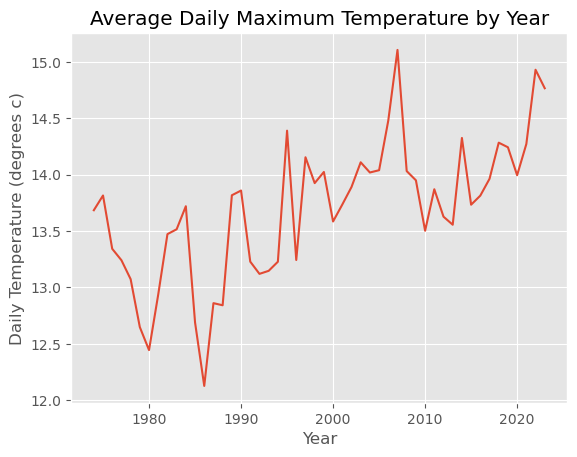

In [36]:
# Plot the maximum temperature graph

plot = sns.lineplot(data=df_maxt, x='date2', y='maxt');
plot.set_xlabel("Year")
plot.set_ylabel("Daily Temperature (degrees c)")
plot.set_title("Average Daily Maximum Temperature by Year");

In [37]:
print(f"The mean daily maximum temperature recorded at Sherkin Island over the last 50 years is {df_maxt['maxt'].mean():.2f} degrees c. \nHowever, over the last 20 years that has risen to {df_maxt['maxt'].tail(24).mean():.2f} degrees c.")

The mean daily maximum temperature recorded at Sherkin Island over the last 50 years is 13.69 degrees c. 
However, over the last 20 years that has risen to 14.08 degrees c.


For the mean daily maximum temperature we see a similar trend as with the mean daily minimum temperature. Again, the data is on an upward trend with the majority of values over the last 20 years being above the 50 year average. Indeed, the average for the last 20 years is almost 0.4 degrees higher than the 50 year average.

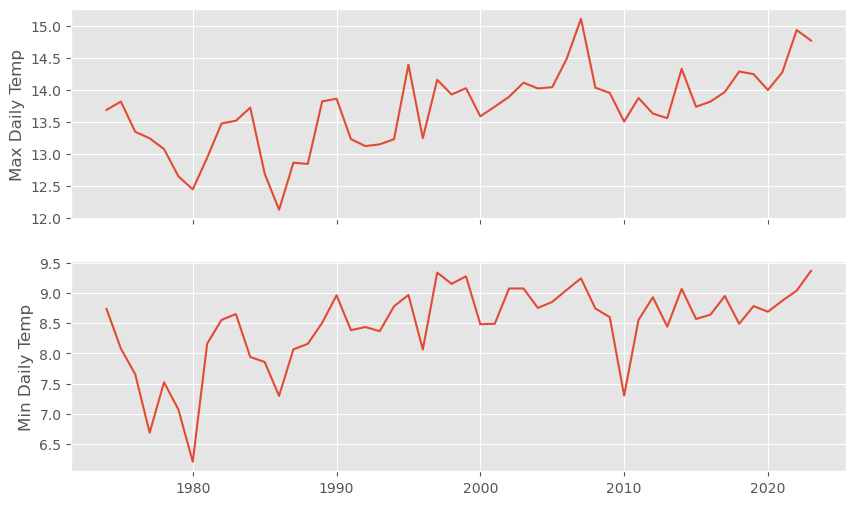

In [38]:
# Compare and plot Average Daily Min and Max Temperatures

plt.style.use('ggplot')
fig, ax = plt.subplots(2,sharex=True,figsize=(10,6))

ax[0].plot(df_maxt['date2'],df_maxt['maxt'])
ax[0].set_ylabel(r'Max Daily Temp')

ax[1].plot(df_mint['date2'],df_mint['mint'])
ax[1].set_ylabel(r'Min Daily Temp');

The above chart shows how both the maximum and minimum daily average temperatures are both generally on the rise and at a very similar rate. This aligns with research by Murphy et al (2023)$^8$ who found that recent average annual temperatures in Ireland have risen when compared with early industrial temperatures.

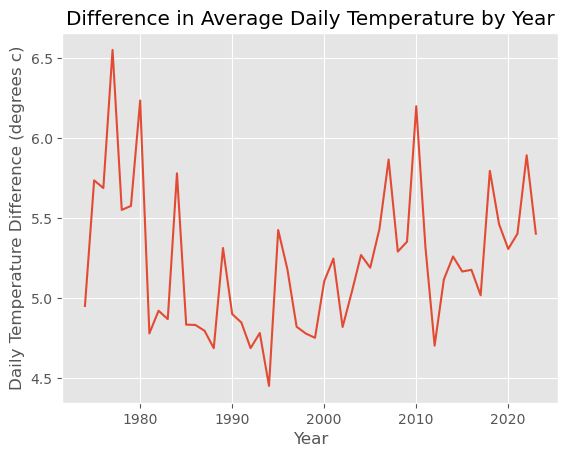

In [39]:
# Plot daily difference in temperature

temp_comp = df_mint
temp_comp['maxt'] = df_maxt['maxt']
temp_comp['diff'] = temp_comp['maxt']-temp_comp['mint']


plot = sns.lineplot(data=temp_comp, x='date2', y='diff')
plot.set_xlabel("Year")
plot.set_ylabel("Daily Temperature Difference (degrees c)")
plot.set_title("Difference in Average Daily Temperature by Year");

When looking at the delta between the average daily maximum and minimum temperature values we can see that the average is approx. 5.5 degrees c. This has reached a peak of 6.5 and a low of 4.5 but is generally consistent. This shows us that as the minimum temperature rises so does the maximum temperature at a similar rate.

# Fuse and Export Data to csv and json

### Create final dataframe by fusing them together

Exported files are located in the /exports folder

In [40]:
# Pull in each of the data sources
very_final_df = final_df_2
very_final_df = very_final_df.rename({'date': 'temp_date', 'Temp': 'temp_anom'}, axis='columns')

# Use inner join with concat: https://sparkbyexamples.com/pandas/pandas-concat-dataframes-explained/
very_final_df= pd.concat([very_final_df, final_co2_df], axis=1, join='inner')
very_final_df = very_final_df.rename({'date': 'co2_date', 'CO2': 'co2_reading'}, axis='columns')

very_final_df= pd.concat([very_final_df, final_ch4_df], axis=1, join='inner')
very_final_df = very_final_df.rename({'year': 'ch4_date', 'CH4': 'ch4_reading'}, axis='columns')

very_final_df= pd.concat([very_final_df, ir_data_si_df], axis=1, join='inner')
very_final_df = very_final_df.drop('date2', axis=1)
very_final_df = very_final_df.rename({'date': 'ir_date', 'rain': 'rainfall','maxt': 'max_temp', 'mint': 'min_temp'}, axis='columns')


### Export final dataframe to csv

In [41]:
FILENAME = "exports/csv_text.csv"
with open(FILENAME, 'w', newline = '') as f:
    writer = csv.writer(f)
    writer.writerows([
        ['Column Descriptions', None],
        ['----', '----'],
        ['temp_date', 'Date of Temperature Reading'],
        ['temp_anom', 'Temperature Anomaly Value'],
        ['co2_date', 'Date of CO2 Reading'],
        ['co2_reading', 'CO2 Value'],
        ['ch4_date', 'Date of CH4 Reading'],
        ['ch4_reading', 'CH4 Value'],
        ['ir_date', 'Irish Data - Date of Reading'],
        ['rainfall', 'Irish Data - Daily Rainfall Value'],
        ['max_temp', 'Irish Data - Maximum Daily Temperature Value'],
        ['min_temp', 'Irish Data - Mimimun Daily Temperature Value'],
        ['', '']
    ])
very_final_df.to_csv(FILENAME, mode = 'a', index = False) # https://stackoverflow.com/questions/17530542/how-to-add-pandas-data-to-an-existing-csv-file

### Export final dataframe to json

In [42]:
FILENAME = "exports/json_text.txt"
very_final_df.to_json(FILENAME, index = True)

# Further Analysis and Discussion

From our earlier plots we could see the peaks and troughs for CH4 and CO2 levels and Temperature Anomaly generally aligned with each other so now lets look at the data in more detail.

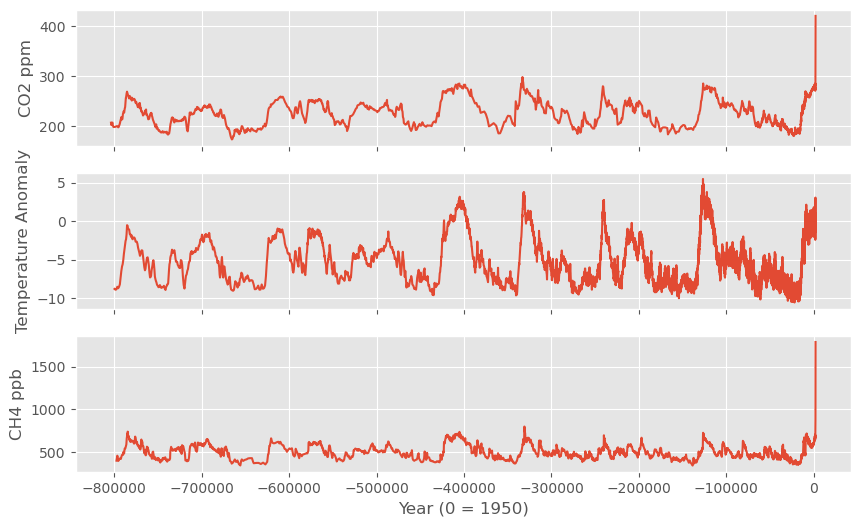

In [43]:
# Plot all three - CO2, Temperature Anomaly and CH4 

plt.style.use('ggplot')
fig, ax = plt.subplots(3,sharex=True,figsize=(10,6))
ax[0].plot(final_co2_df['date'],final_co2_df['CO2'])
ax[0].set_ylabel(r'CO2 ppm')

ax[1].plot(final_df_2['date'],final_df_2['Temp'])
ax[1].set_ylabel(r'Temperature Anomaly')

ax[2].plot(ch4_df['year'],ch4_df['CH4'])
ax[2].set_ylabel(r'CH4 ppb')
ax[2].set_xlabel(r'Year (0 = 1950)');

From looking at the three graphs plotted together, it's clear to see that the peaks and troughs seem to align with each other. Right back from 800000 BC, the Temperature Anomaly, CH4 and CO2 values all rise and fall at approx. the same time. Most interesting, is the recent values from 1950 onwards. We can see that both the values for CO2 and CH4 rise at an extraordinary rate compared to the previous years. We can also see that although the Temperature Anomaly is not as high as the peak of approx. 125000 BC, it has been staying above 0 for a considerable length of time.

Excluding the last 200 years or so, Every time CO2 reached or nearly reached a level of 300 ppm, the Temperature Anomaly was also positive - up to over 5 degrees at one stage.

An interesting feature of our CO2 graph is the way that the peak values happen quickly but the fall back down seems to take a lot longer. Research by Zickfield and Harrington (2015)$^9$ suggests that pulse emissions of CO2 can have an almost immediate effect on CO2 readings in the atmosphere while a steady decline in CO2 levels is caused by the oceans and other factors gradually absorbing the CO2. The gradual decrease in CO2 after an emmision can take thousands of years to return back to normal levels accoring to Archer et al. (2009)$^{10}$ which may explain why our graph shows the seemingly very slow decrease as CO2 readings return back to normal levels after each peak.

Looking at our Temperature Anomaly graph, we can see that each of the peaks over the last 400000 years seems to occur just after CO2 readings spike and tends to last a bit longer. Zickfield and Harrington (2015)$^9$ suggest that temperature increases associated with CO2 emmisions take longer because the oceans initially take the majority of the heat but over time that slows and the atmosphere then starts to warm which potentially explains the small time lag. Research by Ricke and Caldeira (2014)$^{11}$ suggests that the impact on temperature after a CO2 emmission can last for centuries although the maximum warming is felt within a decade.

## Future Predictions 

### CO2

Using the last 20 years worth of data we will plot the future projection of CO2 levels up to 2050

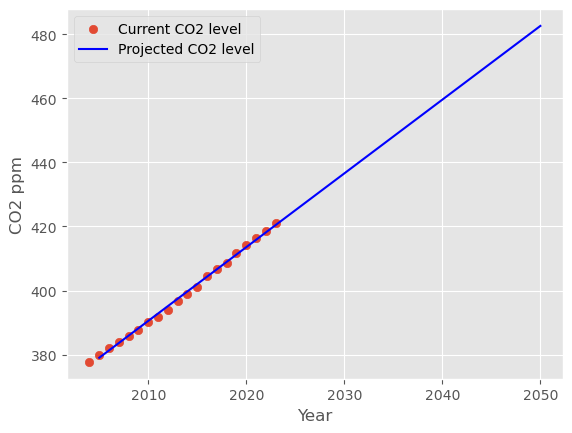

In [44]:
# Future predictions/Regression using data from last 20 years for CO2 Levels
p_data=gml_df.tail(20)
# Reshape/transpose data
years = p_data['date'].to_numpy() # Convert dataframe to array for year variable
CO2_level = p_data['CO2'].to_numpy() # Convert dataframe to array for CO2 variable
years_reshaped = years.reshape(-1,1)
CO2_level_reshaped = CO2_level.reshape(-1,1)

# Linear regression
lr = LinearRegression()
lr.fit(years_reshaped,CO2_level_reshaped)
x_test = np.linspace(2005,2050)
x_testShaped = x_test.reshape(-1,1)
y_testPred = lr.predict(x_testShaped)

# plot the graph
plt.scatter(years_reshaped,CO2_level_reshaped)
plt.plot(x_test, y_testPred, 'b')
plt.ylabel("CO2 ppm")
plt.xlabel("Year")
plt.legend(['Current CO2 level', 'Projected CO2 level']);

The graph shows that if the current rate of increase in CO2 levels continues at the same rate then we could expect to see CO2 levels reach over 480 ppm by the year 2050 compared to the 420 ppm level of today. Published models suggest that CO2 levels could range as high as 600 by the year 2050 if current rates of increases continue. However the NOAA (National Oceanic and Atmospheric Administration) have predicted a level of between 450 and 580 with the average coming in at just under 500 ppm depending on socioeconomic pathways $^{12}$ as shown below.

![CO2 Levels](https://www.climate.gov/sites/default/files/2022-06/IPCC_AR6_WGI_TS-CO21950-2100.gif)
---

### Temperature Anomaly

Using the last 100 years worth of data we will plot the future projection of the Temperature Anomaly using data from 1920s to determine the trend. 

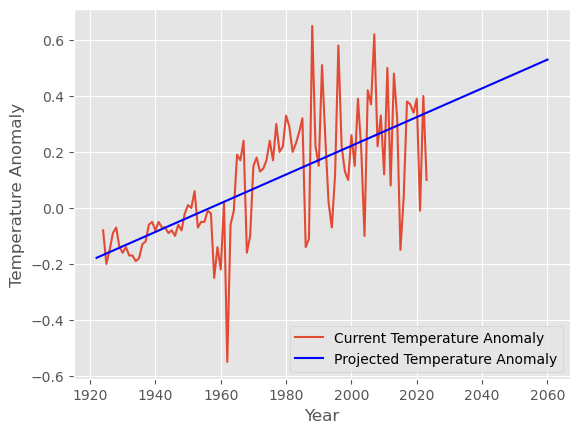

In [45]:
# Future predictions/Regression using data from last 100 years for Temp Anomaly
p_data=temp2_df.tail(100)
# Reshape/transpose data
years = p_data['date'].to_numpy() # Convert dataframe to array for year variable
Temp_Anom = p_data['Temp'].to_numpy() # Convert dataframe to array for CO2 variable
years_reshaped = years.reshape(-1,1)
Temp_Anom_level_reshaped = Temp_Anom.reshape(-1,1)

# Linear regression
lr = LinearRegression()
lr.fit(years_reshaped,Temp_Anom_level_reshaped)
x_test = np.linspace(1922,2060)
x_testShaped = x_test.reshape(-1,1)
y_testPred = lr.predict(x_testShaped)

# plot the graph
plt.plot(years_reshaped,Temp_Anom_level_reshaped)
plt.plot(x_test, y_testPred, 'b')
plt.ylabel("Temperature Anomaly")
plt.xlabel("Year")
plt.legend(['Current Temperature Anomaly', 'Projected Temperature Anomaly']);

The graph shows that the projected Temperature Anomaly will continue to rise reaching a mean value close to 0.5c by 2050. Given the recent range in the mean values from +0.7 to -0.2, by 2050 we would expect all values to be above zero and some years to be close to a full 1 degree above the 1000 year average. Given that this figure is based on the 1000 year average for Temperature Anomaly we could expect the actual increase to be considerably higher.

For example, using a more recent date range to calculate the Temperature Anomaly using dates from 1971 - 1999 the NOAA (National Oceanic and Atmospheric Administration)$^{13}$ predict the average Temperature Anomaly to comfortably exceed 1 degree celcius by 2050 as shown below.   

![Temperature Anomaly](https://www.climate.gov/sites/default/files/2022-05/Screen%20Shot%202022-05-13%20at%204.05.00%20PM.png)   

Red Line - CO2 emissions continue to accelerate at current rate   
Green Line - balanced approach between CO2 emitting and non-emitting fuels   
Blue Line - reduction in CO2 emitting fuels

### CH4

Using the last 20 years worth of data we will plot the future projection of CH4 levels up to 2050.

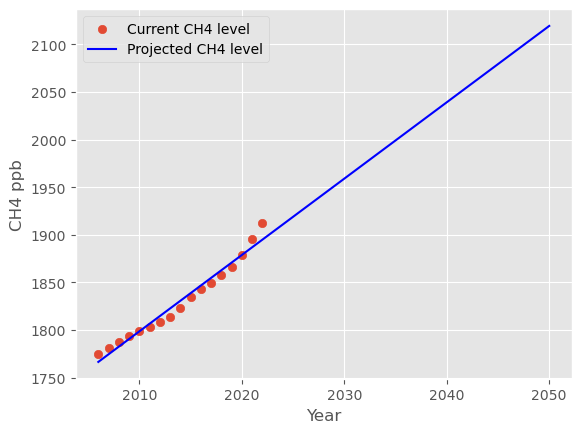

In [46]:
# Future predictions/Regression using data from last 20 years for CH4 levels
p_data=ch4v2_df.tail(17)
# Reshape/transpose data
CH4_years = p_data['year'].to_numpy() # Convert dataframe to array for year variable
CH4_level = p_data['CH4'].to_numpy() # Convert dataframe to array for CO2 variable
CH4_years_reshaped = CH4_years.reshape(-1,1)
CH4_level_reshaped = CH4_level.reshape(-1,1)

# Linear regression
lr = LinearRegression()
lr.fit(CH4_years_reshaped,CH4_level_reshaped)
x_test = np.linspace(2006,2050)
x_testShaped = x_test.reshape(-1,1)
y_testPred = lr.predict(x_testShaped)

# plot the graph
plt.scatter(CH4_years_reshaped,CH4_level_reshaped)
plt.plot(x_test, y_testPred, 'b')
plt.ylabel("CH4 ppb")
plt.xlabel("Year")
plt.legend(['Current CH4 level', 'Projected CH4 level']);

CH4 Levels have been on the rise for many years as our graph shows and taking the rate of increase over the last 20 years we see that by 2050 we could expect CH4 levels to be up to 2150 ppb. However reaserch published by the NOAA (2022)$^{14}$ highlight that the largest annual increase in CH4 levels was seen in 2021 at 17 ppb compared with 15.3 ppb in 2020. If the yearly increase keeps exceeding previous years then we should expect to see the year 2050 values to be quite larger than the prodicted 2150 ppb.

## Accelerated warming

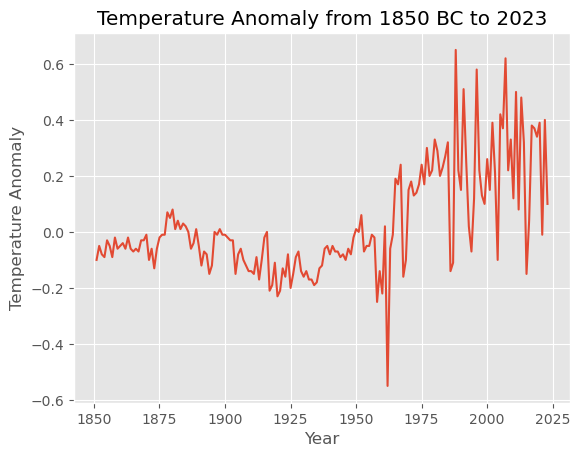

In [47]:
# Plot Temperature Anomaly Graph for last 170 years

plot = sns.lineplot(data=temp2_df, x='date', y='Temp')
plot.set_xlabel("Year")
plot.set_ylabel("Temperature Anomaly")
plot.set_title("Temperature Anomaly from 1850 BC to 2023");

Replotting our Temperature Anomaly graph for the last 170 years we see a steady value up until 1974. Then the value starts to drift above zero indicating that the temperature is getting higher than the average for the last 1000 years. Mooney and Osaka(2023)$^{15}$ writing in The Washington Post report that from 1880 to 1969 there was a relatively small (0.04 degrees celcius) increase per decade in global temperature but that since the early 1970s the planet has seen accelerated warming of almost 0.2 degress celcius each decade. This temperature rise is directly attributed to CO2 levels increasing says Milman (2023)$^{16}$.   

A report by the WWF $^{17}$ also suggests that rises in levels of CO2 are directly impacting temperature levels which in turn are causing more sea ice and glaciers to melt. Ice effectively acts like a barrier to the earth's surface and reflects back sunlight to help keep the planet cooler. As the amount of ice decreases, darker coloured water is exposed and absorbs more sunlight. As the water gets warmer it in turn melts more ice creating what is referred to the ice-albedo feedback cycle $^{18}$ leading to a constant cycle of accelerated warming.
___

# References

$^1$ Bereiter, B., S. Eggleston, J. Schmitt, C. Nehrbass-Ahles, T. F. Stocker, H. Fischer, S. Kipfstuhl, J. Chappellaz. 2015. Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present. Geophysical Research Letters, 42(2), 542-549. doi: 10.1002/2014GL061957   
$^2$ Dr. Tans, P., NOAA/GML (gml.noaa.gov/ccgg/trends/) and Dr. Keeling, R., Scripps Institution of Oceanography (scrippsco2.ucsd.edu/).   
$^3$ https://en.wikipedia.org/wiki/Industrial_Revolution   
$^4$ Center for Sustainable Systems, University of Michigan. 2023. "Greenhouse Gases Factsheet." Pub. No. CSS05-21.   
$^5$ https://climatechange.chicago.gov/climate-indicators/climate-change-indicators-atmospheric-concentrations-greenhouse-gases   
$^6$ Worldbank.org. Climate Change Knowledge Portal. Available at: https://climateknowledgeportal.worldbank.org/country/ireland/climate-data-historical. (Accessed 23rd Dec 2023)   
$^7$ Met Eireann. Historical Data. Available at: https://www.met.ie/climate/available-data/historical-data (Accessed 9th Dec 2023)   
$^8$ Murphy, C., Coen, A., Clancy, I., Decristoforo, V., Cathal, S., Healion, K., Horvath, C., Jessop, C., Kennedy, S., Lavery, R., Leonard, K., McLoughlin, C., Moore, R., O'Hare-Doherty, D., Paisley, R., Prakash, B., Vatu, J., Thorne, P., Mateus, C., Ryan, C., Noone, S. The emergence of a climate change signal in long-term Irish meteorological observations. Weather and Climate Extremes. Vol. 42, 2023, 100608, ISSN 2212-0947, https://doi.org/10.1016/j.wace.2023.100608.   
$^9$ Zickfeld, K. and Herrington, T. 2015. The Time Lag Between a Carbon Dioxide Emmision and Maximum Warming Increases with the Size of the Emmision. Environment Research Letters. Vol. 10 Issue 03. DOI 10.1088/1748-9326/10/3/031001   
$^{10}$ Archer, D., Eby, M., Brovkin, V., Ridgwell, A., Cao, L., Mikolajewicz, U., Caldeira, K., Matsumoto, K., Munhoven, G., Montenegro, A. and Tokos, K. 2009. Atmospheric lifetime of fossil fuel carbon dioxide. Annual review of earth and planetary sciences, 37, pp.117-134.   
$^{11}$ Ricke, L. and Caldeira, K. 2014. Maximum Warming Occurs about one Decade after a Carbon Dioxide Emission. Environmental Research Letters. Vol. 9 Issue 12. DOI 10.1088/1748-9326/9/12/124002   
$^{12}$ Lindsley, R. 2023 Climate Change: Atmospheric Carbon Dioxide. Climate.gov. Available at https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide (Accessed 6th Jan 2024)   
$^{13}$ Herring, D. 2012 Climate Change: Global Temperature Predictions. Climate.gov. Available at: https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature-projections (Accessed 7th Jan 2024)   
$^{14}$ National Oceanic and Atmospheric Administration. 2022. Increase in Atmospheric Methane set Another Record in 2021. Available at: https://www.noaa.gov/news-release/increase-in-atmospheric-methane-set-another-record-during-2021 (Accessed 9th Jan 2024)
$^{15}$ Mooney, C. and Osaka, S. 2023. Is Climate Change Speeding Up. The Washington Post. Available at: https://www.washingtonpost.com/climate-environment/2023/12/26/global-warming-accelerating-climate-change/ (Accessed 6th Jan 2024)   
$^{16}$ Milman, O. 2023 Global Heating is Accelerating, warns scientist who Sounded Climate Alarm in the 802. The Guardian.com Available at: https://www.theguardian.com/environment/2023/nov/02/heating-faster-climate-change-greenhouse-james-hansen#:~:text=Global%20heating%20is%20accelerating%20faster,world%20to%20the%20greenhouse%20effect (Accessed on 5th Jan 2024)   
$^{17}$ Hancock, L. nd. Why are Glaciers and Sea Ice Melting? WWF. Available at: https://www.worldwildlife.org/pages/why-are-glaciers-and-sea-ice-melting (Accessed 6th Jan 2024)   
$^{18}$ Gold, A. 2021 Five Facts to Help you Understand Sea Ice. NASA: Global Climate Change. Available at https://climate.nasa.gov/news/3122/five-facts-to-help-you-understand-sea-ice/ (Accessed 9th Jan 2024)   


---


# Appendix

Data Sources

CO2   
-800000 to 2001 (present is 1950) from ice cores
https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt   
Taken from https://www.ncei.noaa.gov/access/paleo-search/study/17975

Link to Mauna Loa data 1959 - 2022
https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv   
Taken from https://gml.noaa.gov/ccgg/trends/data.html   


Temperature Anomoly   
-800000 to 2000 EPICA Dome C Ice Core 
https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt   
Taken from https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/

1850 - 2023
https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/antarctic/land_ocean/12/11/1850-2023/data.csv   
Taken From https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/   


CH4   
-800000 to 2015
https://climatechange.chicago.gov/climate-indicators/climate-change-indicators-atmospheric-concentrations-greenhouse-gases   
Taken from https://climatechange.chicago.gov/sites/production/files/2016-08/ghg-concentrations_fig-2.csv   

1984 - 2022
https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt   
Taken from https://gml.noaa.gov/ccgg/trends_ch4/

***

#### End